# 互联网金融项目

项目背景

互联网金融的本质是金融，金融的核心在于风控，对于网贷平台来说，风控能力决定了互联网金融企业的竞争力

，逾期客户画像主要在于得出未按时还款客户的整体画像，帮助企业降低坏账率，给放贷与否以及额度给与指导，

另外分析各维度的不良贷款率情况，以及放贷比例，可以给企业提出一些有效的参考建议。

此次项目数据来自通用性借款和其他借款，数据是从2015-01-01到 2017-01-30 的所有信用标的10%样本 。



## 数据介绍

所提供数据为拍拍贷真实业务数据，但仅为信用标的一个样本，仅供数据分析和学术研究目的使用，而非信息披露。
、
所提供数据包含了成交时间从2015年1月1日到2017年1月30日的328553支信用标。

1）LC (Loan Characteristics) 表：
标的特征表，每支标一条记录。共有21个字段，包括一个主键（listingid）、7个标的特征和13个成交当时的借款人信息，全部为成交当时可以获得的信息。具体的字段描述请见数据字典。

2）LP (Loan Periodic) 表：
标的还款计划和还款记录，每支标每期还款为一条记录。 还款记录和状态更新至2017年2月22日。共有10个字段，包括两个主键（listingid和期数），3个还款计划字段和4个还款状态字段。具体的字段描述请见数据字典。

3）LCIS (Loan Characteristics Investment Status ) 表：
所提供数据包含了该客户投资的从2015年1月1日起成交的所有标。
以6个月月底的最后一天（2016年9月30日，2016年10月31日，2016年11月30日，2016年12月31日，2017年1月31日，2017年2月28日）作为recorddate，对每一个recorddate都提供了该客户投资的从2015年1月1日起到当天成交的所有标的数据，包括这些标成交时的特点（Loan Characteristics）、该客户投资的金额以及截至当天的收款情况（Investment Status）。

LC部分共有 21 个字段，包括 1 个主键（listingid）、7 个标的特征和 13 个成交当时的借款人信息，全部为成交当时可以获得的信息。

IS部分有 15 个字段，包括截至recorddate当天标的还款状态，针对这位客户的已还和待还金额，最近的还款情况和下一期还款计划。具体字段描述请见数据字典。

## 分析内容介绍


### 分析思路

- 借款数据

1. 熟悉数据
    - 导入数据
    - 熟悉数据
    - 分类变量
2. 数据清洗
    - 统一变量名
    - 缺失值处理
    - 重复值，异常值处理
3. 逾期用户画像
    - 用户基本信息分析
    - 用户行为信息分析
4. 不良率分析
    - 随记录时间变化趋势
    - 与年龄性别的相关性
    - 与初始评级的相关性
    - 与借款信息的相关性
5. 总结与建议

## 理解数据

结合业务知识进行分类

- 还款情况：和还款相关的变量
- 基本属性：年龄，性别和学历等情况
- 行为属性：手机认证，视频认证，网页浏览等数据
- 借款信息：借款金额，借款期限和借款利率等
- 交易信息：客户发生的交易行为数据，例如购物等信息

来分析一下LC.csv数据集，LC (Loan Characteristics) 表为标的特征表，每支标一条记录

- 1 个主键（listingid）
- 7 个标的特征
- 13 个成交当时的借款人信息，全部为成交当时可以获得的信息。

信息的维度比较广，大致可以分为基本信息，认证信息，信用信息，借款信息。

- 基本信息：年龄、性别；
- 认证信息：手机认证、户口认证、视频认证、征信认证、淘宝认证；
- 信用信息：初始评级、历史正常还款期数、历史逾期还款期数；
- 借款信息：历史成功借款金额、历史成功借款次数、借款金额、借款期限、借款成功日期

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 解决文字乱码的问题
plt.rcParams['font.sans-serif']=['SimHei'] # 解决中文显示乱码
plt.rcParams['axes.unicode_minus']=False # 正常显示 符号。 比如 符号 之类的

对于LC数据集我们提出以下四个问题：

- 用户画像，包含使用平台贷款业务的用户的性别比例，学历水平，是否为旧有用户，年龄分布等信息。

- 资金储备，每日借款金额大概多少？波动有多大？从而公司每日需准备多少资金可以保证不会出现资金短缺？

- 用户逾期率，借款人的初始评级、借款类型、性别、年龄等特征对于逾期还款的概率有无显著影响？哪些群体逾期还款率明显较高？

- 借款利率，哪些群体更愿意接受较高的借款利率？

In [3]:
LC = pd.read_csv('ppdai_3_23/LC.csv')
LP = pd.read_csv('ppdai_3_23/LP.csv')

In [4]:
LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ListingId  328553 non-null  int64  
 1   借款金额       328553 non-null  int64  
 2   借款期限       328553 non-null  int64  
 3   借款利率       328553 non-null  float64
 4   借款成功日期     328553 non-null  object 
 5   初始评级       328553 non-null  object 
 6   借款类型       328553 non-null  object 
 7   是否首标       328553 non-null  object 
 8   年龄         328553 non-null  int64  
 9   性别         328553 non-null  object 
 10  手机认证       328553 non-null  object 
 11  户口认证       328553 non-null  object 
 12  视频认证       328553 non-null  object 
 13  学历认证       328553 non-null  object 
 14  征信认证       328553 non-null  object 
 15  淘宝认证       328553 non-null  object 
 16  历史成功借款次数   328553 non-null  int64  
 17  历史成功借款金额   328553 non-null  float64
 18  总待还本金      328553 non-null  float64
 19  历史正常还款期数   328553 non-n

In [5]:
LC.describe()

,ListingId,借款金额,借款期限,借款利率,年龄,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
count,3.285530e+05,328553.000000,328553.000000,328553.000000,328553.000000,328553.000000,3.285530e+05,3.285530e+05,328553.000000,328553.000000
mean,1.907948e+07,4423.816906,10.213594,20.601439,29.143042,2.323159,8.785857e+03,3.721665e+03,9.947658,0.423250
std,8.375769e+06,11219.664024,2.780444,1.772408,6.624286,2.922361,3.502736e+04,8.626061e+03,14.839899,1.595681
min,1.265410e+05,100.000000,1.000000,6.500000,17.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.190887e+07,2033.000000,6.000000,20.000000,24.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.952325e+07,3397.000000,12.000000,20.000000,28.000000,2.000000,5.000000e+03,2.542410e+03,5.000000,0.000000
75%,2.629862e+07,5230.000000,12.000000,22.000000,33.000000,3.000000,1.035500e+04,5.446810e+03,13.000000,0.000000
max,3.281953e+07,500000.000000,24.000000,24.000000,56.000000,649.000000,7.405926e+06,1.172653e+06,2507.000000,60.000000


In [2]:
data=pd.read_csv("./ppdai_3_23/LCIS.csv",dtype={"ListingId":str})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292539 entries, 0 to 292538
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ListingId   292539 non-null  object 
 1   借款金额        292539 non-null  int64  
 2   借款期限        292539 non-null  int64  
 3   借款利率        292539 non-null  float64
 4   借款成功日期      292539 non-null  object 
 5   初始评级        292539 non-null  object 
 6   借款类型        292539 non-null  object 
 7   是否首标        292539 non-null  object 
 8   年龄          292539 non-null  int64  
 9   性别          292539 non-null  object 
 10  手机认证        292539 non-null  object 
 11  户口认证        292539 non-null  object 
 12  视频认证        292539 non-null  object 
 13  学历认证        292539 non-null  object 
 14  征信认证        292539 non-null  object 
 15  淘宝认证        292539 non-null  object 
 16  历史成功借款次数    291336 non-null  float64
 17  历史成功借款金额    291336 non-null  float64
 18  总待还本金       292539 non-null  float64
 19  历史

In [3]:
data.head(5)

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,recorddate
0,1693100,3629,6,12.0,2015/1/28,AA,普通,否,31,男,...,0.00,0,已还清,2015/7/28,34.20,0.30,NaN,NaN,NaN,2016/12/31
1,1713229,3000,12,12.0,2015/1/30,AA,普通,是,24,男,...,0.00,0,已还清,2015/10/19,173.39,1.05,NaN,NaN,NaN,2016/12/31
2,1904026,3629,12,12.0,2015/3/7,AA,普通,否,27,男,...,0.00,0,已还清,2016/3/6,44.04,0.38,NaN,NaN,NaN,2016/12/31
3,2158281,3919,12,18.0,2015/4/14,C,普通,否,28,男,...,0.00,0,已还清,2015/5/19,92.34,0.22,NaN,NaN,NaN,2016/12/31
4,2257194,14000,12,18.0,2015/4/23,C,普通,否,46,男,...,9.92,589,逾期中,NaN,NaN,NaN,2015/5/23,7.66,1.5,2016/12/31


In [4]:
data.describe()

,借款金额,借款期限,借款利率,年龄,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,我的投资金额,...,当前还款期数,已还本金,已还利息,待还本金,待还利息,标当前逾期天数,上次还款本金,上次还款利息,下次计划还款本金,下次计划还款利息
count,292539.000000,292539.000000,292539.000000,292539.000000,291336.000000,2.913360e+05,2.925390e+05,2.925390e+05,292539.000000,292539.000000,...,292539.000000,292539.000000,292539.000000,292539.000000,292539.000000,292539.000000,270290.000000,270290.000000,182563.000000,181494.000000
mean,8516.123713,10.191974,17.783796,29.353949,2.583769,1.513134e+04,4.499622e+03,7.664124e+01,18.366290,96.347625,...,5.653215,72.086067,4.796278,24.475503,1.669001,3.185104,21.278687,0.481281,6.042533,0.584434
std,27584.913864,3.148704,3.375216,6.165157,5.081881,7.026413e+04,1.698939e+04,4.672302e+03,1256.978087,117.748925,...,11.146470,122.297594,6.482616,30.993081,2.305682,27.908310,48.777880,0.421215,4.374562,0.331167
min,100.000000,1.000000,7.000000,18.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.000000,6.000000,16.000000,25.000000,1.000000,1.000000e+03,0.000000e+00,0.000000e+00,0.000000,50.000000,...,2.000000,12.000000,1.560000,0.000000,0.000000,0.000000,4.220000,0.150000,4.130000,0.370000
50%,4107.000000,12.000000,18.000000,28.000000,2.000000,6.500000e+03,2.883070e+03,7.000000e+00,0.000000,50.000000,...,5.000000,28.260000,2.660000,21.540000,0.750000,0.000000,6.730000,0.440000,4.430000,0.570000
75%,7000.000000,12.000000,20.000000,32.000000,4.000000,1.369200e+04,5.890600e+03,1.500000e+01,0.000000,58.000000,...,7.000000,50.000000,4.890000,41.980000,2.910000,0.000000,16.740000,0.700000,8.120000,0.760000
max,500000.000000,24.000000,24.000000,65.000000,487.000000,3.856476e+06,1.697706e+06,1.625000e+06,524034.000000,2190.000000,...,1100.000000,2190.000000,269.600000,1100.000000,87.740000,681.000000,1413.000000,11.770000,96.900000,8.920000


## 数据预处理

### 缺失值处理

In [5]:
columns={"ListingId":'列表序号','recorddate':'记录日期'}
data.rename(columns=columns,inplace=True)

In [6]:
miss_rate=pd.DataFrame(data.apply(lambda x:sum(x.isnull())/len(x),axis=0)) # 按列操作 计算 null 值 缺失率
miss_rate.columns=['缺失率']
miss_rate

,缺失率
列表序号,0.000000
借款金额,0.000000
借款期限,0.000000
借款利率,0.000000
借款成功日期,0.000000
初始评级,0.000000
借款类型,0.000000
是否首标,0.000000
年龄,0.000000
性别,0.000000


In [7]:
miss_rate[miss_rate['缺失率']>0]['缺失率'].apply(lambda x:format(x,'.3%'))

历史成功借款次数     0.411%
历史成功借款金额     0.411%
上次还款日期       7.195%
上次还款本金       7.605%
上次还款利息       7.605%
下次计划还款日期    37.594%
下次计划还款本金    37.594%
下次计划还款利息    37.959%
记录日期         0.140%
Name: 缺失率, dtype: object

In [8]:
data[data['下次计划还款利息'].isnull()].head(3)
# 发现大部分都是 已还清 
# 所以 下次 还款 以及 本机 利息 有缺失很正常

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
0,1693100,3629,6,12.0,2015/1/28,AA,普通,否,31,男,...,0.0,0,已还清,2015/7/28,34.20,0.30,NaN,NaN,NaN,2016/12/31
1,1713229,3000,12,12.0,2015/1/30,AA,普通,是,24,男,...,0.0,0,已还清,2015/10/19,173.39,1.05,NaN,NaN,NaN,2016/12/31
2,1904026,3629,12,12.0,2015/3/7,AA,普通,否,27,男,...,0.0,0,已还清,2016/3/6,44.04,0.38,NaN,NaN,NaN,2016/12/31


In [9]:
data[data['下次计划还款利息'].isnull()]['标当前状态'].value_counts()

已还清      109168
正常还款中       674
0           409
3.56         26
5            26
          ...  
2.94          1
3.78          1
5.96          1
1.12          1
37.59         1
Name: 标当前状态, Length: 233, dtype: int64

In [10]:
data[data['上次还款利息'].isnull()].head(3)
# 发现 分两种情况
# 说明他上次没有还过款
# 1。客户首次还款日期还没有到
# 2. 客户逾期未还款 上月没有还款，当然没有还款日期和 还款信息

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
4,2257194,14000,12,18.0,2015/4/23,C,普通,否,46,男,...,9.92,589,逾期中,NaN,NaN,NaN,2015/5/23,7.66,1.50,2016/12/31
133,26652472,6066,12,22.0,2016/12/4,C,普通,否,35,男,...,6.77,0,正常还款中,NaN,NaN,NaN,2017/1/4,4.13,1.01,2016/12/31
134,26753604,6000,6,20.0,2016/12/5,C,普通,否,28,男,...,3.42,0,正常还款中,NaN,NaN,NaN,2017/1/5,9.27,0.96,2016/12/31


In [11]:
data[data['上次还款利息'].isnull()]['标当前状态'].value_counts()

正常还款中    20103
逾期中        943
0          409
3.56        26
5           26
         ...  
2.01         1
1.47         1
7.12         1
0.83         1
11.11        1
Name: 标当前状态, Length: 233, dtype: int64

In [12]:
data[data['历史成功借款次数'].isnull()].head()



,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
118020,1625423,4140,3,12.0,2015/1/8,AA,普通,否,36,男,...,0.84,0,0,0,NaN,NaN,16.84,0.00,NaN,NaN
118021,1678223,4921,12,12.0,2015/1/23,AA,普通,否,27,女,...,9.68,0,0,0,NaN,NaN,13.07,0.07,NaN,NaN
118022,1710623,5728,12,12.0,2015/2/1,AA,普通,否,28,女,...,33.04,0,0,0,NaN,NaN,44.06,0.36,NaN,NaN
118023,1839423,120000,6,18.0,2015/2/12,B,电商,是,36,男,...,10.41,0,0.49,447,NaN,NaN,35.09,1.06,NaN,0
118024,1993823,3869,12,12.0,2015/3/23,AA,普通,否,29,男,...,20.99,0,0,0,NaN,NaN,298.93,0.00,NaN,NaN


In [13]:
data[data['历史成功借款次数'].isnull()][['历史正常还款期数','历史逾期还款期数','历史成功借款次数','历史成功借款金额','借款类型','是否首标']][100:110]
# 一般来说 历史成功借款 这个参数。  缺失的话 。 说明客户是第一次借款
# 但是发现还是有很多  不是第一次借款的。 历史成功借款 这个两个参数 也是 缺失的
# 因为有 历史还款期数 和 历史逾期还款期

,历史正常还款期数,历史逾期还款期数,历史成功借款次数,历史成功借款金额,借款类型,是否首标
118120,0,0,NaN,NaN,APP闪电,是
118121,24650,8694,NaN,NaN,其他,否
118122,46817,16020,NaN,NaN,普通,否
118123,0,0,NaN,NaN,APP闪电,是
118124,0,0,NaN,NaN,APP闪电,是
118125,2100,1100,NaN,NaN,APP闪电,否
118126,6000,4143,NaN,NaN,普通,否
118127,0,0,NaN,NaN,其他,是
118128,6136,0,NaN,NaN,APP闪电,否
118129,3320,2699,NaN,NaN,APP闪电,否


In [14]:
data.columns

Index(['列表序号', '借款金额', '借款期限', '借款利率', '借款成功日期', '初始评级', '借款类型', '是否首标', '年龄',
       '性别', '手机认证', '户口认证', '视频认证', '学历认证', '征信认证', '淘宝认证', '历史成功借款次数',
       '历史成功借款金额', '总待还本金', '历史正常还款期数', '历史逾期还款期数', '我的投资金额', '当前到期期数',
       '当前还款期数', '已还本金', '已还利息', '待还本金', '待还利息', '标当前逾期天数', '标当前状态', '上次还款日期',
       '上次还款本金', '上次还款利息', '下次计划还款日期', '下次计划还款本金', '下次计划还款利息', '记录日期'],
      dtype='object')

In [15]:
# 看下 记录日期 缺失
data[data['记录日期'].isnull()]

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
118020,1625423,4140,3,12.0,2015/1/8,AA,普通,否,36,男,...,0.84,0,0,0,NaN,NaN,16.84,0.00,NaN,NaN
118021,1678223,4921,12,12.0,2015/1/23,AA,普通,否,27,女,...,9.68,0,0,0,NaN,NaN,13.07,0.07,NaN,NaN
118022,1710623,5728,12,12.0,2015/2/1,AA,普通,否,28,女,...,33.04,0,0,0,NaN,NaN,44.06,0.36,NaN,NaN
118024,1993823,3869,12,12.0,2015/3/23,AA,普通,否,29,男,...,20.99,0,0,0,NaN,NaN,298.93,0.00,NaN,NaN
118025,1994223,14053,12,18.0,2015/3/17,D,其他,否,51,男,...,9.92,0,0,0,NaN,NaN,9.1,0.06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288446,9516904,20000,12,18.0,2016/3/12,F,普通,否,26,女,...,3.68,0,0,0,NaN,NaN,26.15,0.05,NaN,NaN
288449,9598504,10000,12,20.0,2016/3/12,C,普通,否,23,男,...,1.52,0,0,0,NaN,NaN,46.21,0.68,NaN,NaN
288470,13571304,516,6,18.0,2016/6/9,B,APP闪电,否,30,男,...,1.38,0,0,0,NaN,NaN,33.83,0.00,NaN,NaN
288474,14349304,799,12,18.0,2016/6/22,B,APP闪电,否,25,男,...,5.00,0,0,0,NaN,NaN,4.52,0.06,NaN,NaN


In [16]:
data[data['记录日期'].isnull()][['手机认证', '户口认证', '视频认证', '学历认证', '征信认证']][10:20]
# 发现手机认证这一栏 很多都是 已婚 未婚 ， 户口认证 都是 本科 这类 学历。
# 学历认证都是 是否成功认证
# 手机认证 和户口认证 都是 错误值。

# 我们需要删除 处理

,手机认证,户口认证,视频认证,学历认证,征信认证
118031,未婚,本科,成功认证,未成功认证,成功认证
118032,未婚,本科,未成功认证,未成功认证,未成功认证
118033,其他,本科,成功认证,未成功认证,未成功认证
118034,未婚,大专,成功认证,未成功认证,未成功认证
118035,已婚,中专,未成功认证,未成功认证,未成功认证
118036,已婚,大专,成功认证,未成功认证,未成功认证
118037,未婚,大专,成功认证,未成功认证,未成功认证
118038,已婚,大专,成功认证,未成功认证,未成功认证
118039,未婚,中专,成功认证,未成功认证,未成功认证
118040,已婚,高中,成功认证,未成功认证,未成功认证


In [17]:
data[['手机认证', '户口认证', '视频认证', '学历认证', '征信认证']].head()
# 正常的值 都是 是否成功认证。
# 所以记录日期 是 NaN 的值  都是有问题的

,手机认证,户口认证,视频认证,学历认证,征信认证
0,成功认证,未成功认证,未成功认证,未成功认证,未成功认证
1,成功认证,未成功认证,未成功认证,未成功认证,未成功认证
2,成功认证,未成功认证,未成功认证,未成功认证,未成功认证
3,成功认证,成功认证,未成功认证,未成功认证,未成功认证
4,成功认证,未成功认证,未成功认证,未成功认证,未成功认证


In [18]:
# 删除错误的记录日期 所在行。
data.dropna(subset=['记录日期'],how='any',inplace=True) # 删除 记录日期中的 NaN 值

### 重复值处理

In [19]:
# new=data[~data.duplicated()] 或者 也可以  。 但是这种方法 比较消耗内存
# 用这个函数 删除重复值 
data.drop_duplicates(inplace=True)
#data[data.duplicated()]

In [20]:
data[(data['列表序号']=='1638462')] # 其中一条重复值的 样子

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
48814,1638462,12716,12,18.0,2015/1/8,C,其他,否,28,男,...,0.0,0,已还清,2015/8/19,23.71,0.09,NaN,NaN,NaN,2016/12/31
131681,1638462,12716,12,18.0,2015/1/8,C,其他,否,28,男,...,0.0,0,已还清,2015/8/19,23.71,0.09,NaN,NaN,NaN,2016/9/30
178192,1638462,12716,12,18.0,2015/1/8,C,其他,否,28,男,...,0.0,0,已还清,2015/8/19,23.71,0.09,NaN,NaN,NaN,2016/10/31
220345,1638462,12716,12,18.0,2015/1/8,C,其他,否,28,男,...,0.0,0,已还清,2015/8/19,23.71,0.09,NaN,NaN,NaN,2017/2/28
278330,1638462,12716,12,18.0,2015/1/8,C,其他,否,28,男,...,0.0,0,已还清,2015/8/19,23.71,0.09,NaN,NaN,NaN,2016/11/30


In [21]:
data['手机认证'].value_counts() # 针对这些 我们还是做一个剔除处理  

成功认证     153395
未成功认证    137835
未婚          415
已婚          349
其他           30
Name: 手机认证, dtype: int64

In [22]:
data['户口认证'].value_counts() # 也是要剔除 

未成功认证     269709
成功认证       21521
大专           343
本科           264
高中            97
中专            42
研究生或以上        19
未填            16
初中及以下         13
Name: 户口认证, dtype: int64

In [23]:
data=data[np.in1d(data['手机认证'].values,['成功认证','未成功认证'])]
# 通过成员判断以及  bool mask 进行剔除

In [24]:
data['手机认证'].value_counts() # 确认下 是否都是正确数据

# 这里 都验证了 比如淘宝之类的 
# 都没问题了

成功认证     153395
未成功认证    137835
Name: 手机认证, dtype: int64

## 构建模型

逾期用户画像

1. 不同性别的房贷比例与逾期关系

In [25]:
df_gender=pd.pivot_table(data=data,columns='标当前状态',index='性别',values='列表序号',aggfunc=np.size)
df_gender

标当前状态,已还清,正常还款中,逾期中
性别,,,
女,29881,68967,2857
男,79248,103538,6739


In [26]:
print(df_gender.sum().sum()) # 合计 29万多单

df_gender.sum() 

291230


标当前状态
已还清      109129
正常还款中    172505
逾期中        9596
dtype: int64

In [27]:
sum_=df_gender.apply(np.sum,axis=1) # 男女分类 汇总
df_gender['合计']=sum_ # 按行 合计
#df_gender['合计']
sum_


性别
女    101705
男    189525
dtype: int64

In [28]:
sum_.sum() # 总计借款笔数

291230

In [29]:
# 借款笔数占比
# 这个占比是 与 总笔数的占比
df_gender['借款笔数占比']=sum_/sum_.sum()
df_gender


标当前状态,已还清,正常还款中,逾期中,合计,借款笔数占比
性别,,,,,
女,29881,68967,2857,101705,0.349226
男,79248,103538,6739,189525,0.650774


In [30]:
# 逾期占比
# 逾期笔数占比
# df_gender['逾期笔数占比']
# 这个逾期笔数 只在 自己性别中的占比
df_gender['逾期笔数占比']=df_gender['逾期中']/sum_
df_gender

标当前状态,已还清,正常还款中,逾期中,合计,借款笔数占比,逾期笔数占比
性别,,,,,,
女,29881,68967,2857,101705,0.349226,0.028091
男,79248,103538,6739,189525,0.650774,0.035557


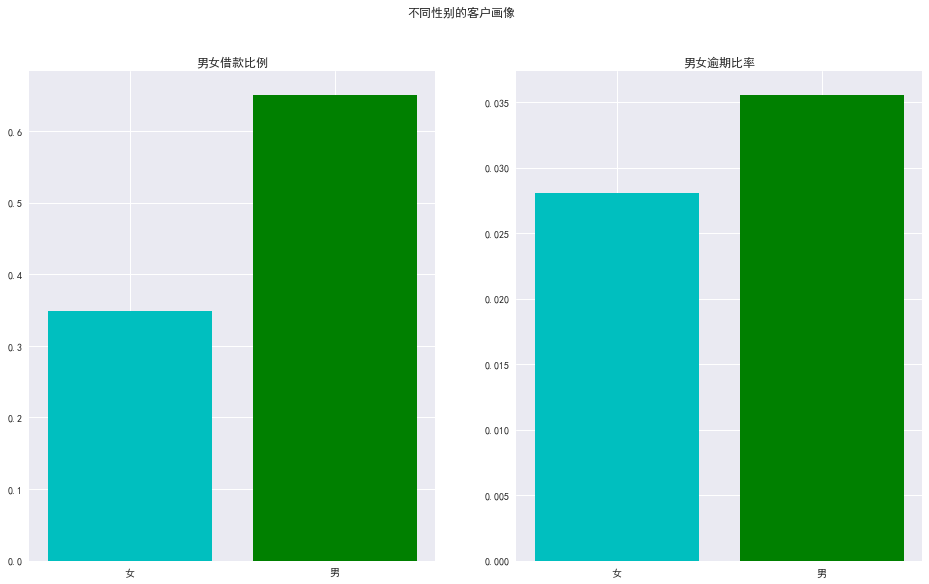

In [150]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.bar(x=df_gender.index,height=df_gender['借款笔数占比'],color=['c','g'])
plt.title('男女借款比例')
plt.subplot(122)
plt.bar(x=df_gender.index,height=df_gender['逾期笔数占比'],color=['c','g'])
plt.title('男女逾期比率')
plt.suptitle('不同性别的客户画像')
plt.show()

2. 不同年龄段逾期表现

In [167]:
data.columns

Index(['列表序号', '借款金额', '借款期限', '借款利率', '借款成功日期', '初始评级', '借款类型', '是否首标', '年龄',
       '性别', '手机认证', '户口认证', '视频认证', '学历认证', '征信认证', '淘宝认证', '历史成功借款次数',
       '历史成功借款金额', '总待还本金', '历史正常还款期数', '历史逾期还款期数', '我的投资金额', '当前到期期数',
       '当前还款期数', '已还本金', '已还利息', '待还本金', '待还利息', '标当前逾期天数', '标当前状态', '上次还款日期',
       '上次还款本金', '上次还款利息', '下次计划还款日期', '下次计划还款本金', '下次计划还款利息', '记录日期',
       'age_bin', '年龄分段'],
      dtype='object')

In [168]:
# df_age
df_age=data.groupby(['年龄'])['借款金额'].sum() # 各 年龄段借款金额

df_age=pd.DataFrame(df_age)
df_age

,借款金额
年龄,
18,674385
19,3661457
20,7744701
21,18611341
22,52258221
23,98477249
24,113366470
25,133387266
26,175863100


In [169]:
# df_age['借款金额累计情况']

df_age['借款金额累计']=df_age['借款金额'].cumsum() # 累计求和

df_age['借款金额累计']

年龄
18        674385
19       4335842
20      12080543
21      30691884
22      82950105
23     181427354
24     294793824
25     428181090
26     604044190
27     778320378
28     946588491
29    1128068804
30    1276202588
31    1431265238
32    1587222056
33    1717262198
34    1841497755
35    1933338943
36    2009248369
37    2095316660
38    2153964263
39    2189488424
40    2231195172
41    2263293901
42    2304405828
43    2333209183
44    2366873048
45    2391737652
46    2410279131
47    2424148744
48    2435491588
49    2440793526
50    2452338718
51    2461125631
52    2467059274
53    2471204513
54    2472949400
55    2474463774
56    2477416574
60    2477466574
65    2479966574
Name: 借款金额累计, dtype: int64

In [170]:
# df_age['借款金额累计占比']

df_age['借款金额累计占比']=df_age['借款金额累计']/df_age['借款金额'].sum()
df_age['借款金额累计占比']

年龄
18    0.000272
19    0.001748
20    0.004871
21    0.012376
22    0.033448
23    0.073157
24    0.118870
25    0.172656
26    0.243569
27    0.313843
28    0.381694
29    0.454873
30    0.514605
31    0.577131
32    0.640018
33    0.692454
34    0.742549
35    0.779583
36    0.810192
37    0.844897
38    0.868546
39    0.882870
40    0.899688
41    0.912631
42    0.929208
43    0.940823
44    0.954397
45    0.964423
46    0.971900
47    0.977493
48    0.982066
49    0.984204
50    0.988860
51    0.992403
52    0.994795
53    0.996467
54    0.997170
55    0.997781
56    0.998972
60    0.998992
65    1.000000
Name: 借款金额累计占比, dtype: float64

In [171]:
# 二八原则 。 看看 百分之八十
df_age[df_age['借款金额累计占比']>0.8]['借款金额累计占比']
# 百分之80 的贷款 是 18岁到 36 岁的人 贷的。

年龄
36    0.810192
37    0.844897
38    0.868546
39    0.882870
40    0.899688
41    0.912631
42    0.929208
43    0.940823
44    0.954397
45    0.964423
46    0.971900
47    0.977493
48    0.982066
49    0.984204
50    0.988860
51    0.992403
52    0.994795
53    0.996467
54    0.997170
55    0.997781
56    0.998972
60    0.998992
65    1.000000
Name: 借款金额累计占比, dtype: float64

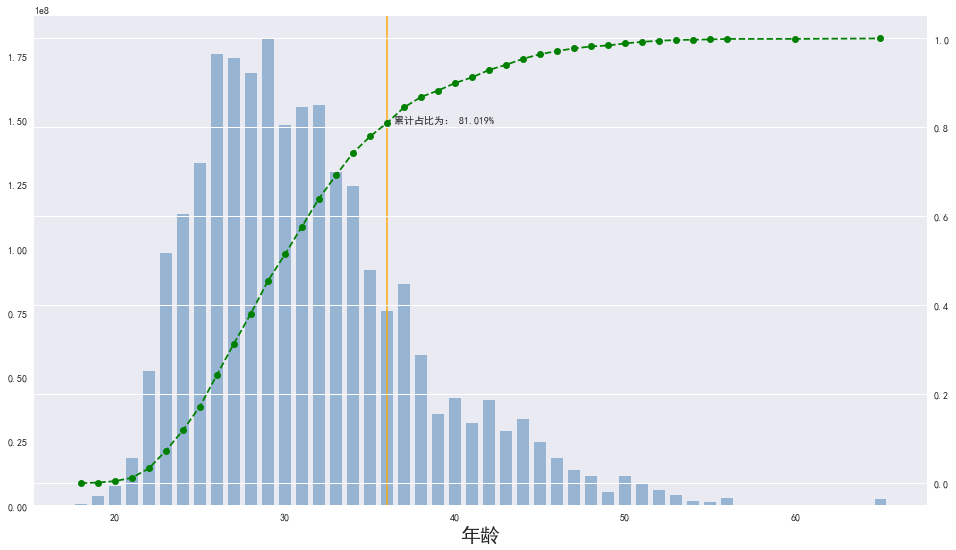

In [172]:
index_num=36
cum_percent=df_age[df_age['借款金额累计占比']>0.8]['借款金额累计占比'][0:1].values[0]
plt.figure(figsize=(16,9))
plt.bar(x=df_age.index,height=df_age['借款金额'],color='steelblue',alpha=0.5,width=0.7)
plt.xlabel("年龄",fontdict={"size":20}) # 
plt.axvline(x=index_num,color='orange',linestyle='-',alpha=0.8) # 加一根垂直 辅助线
df_age['借款金额累计占比'].plot(style='--ob',secondary_y=True,c='green') # 双坐标轴 折线图
plt.text(index_num+0.4,cum_percent,'累计占比为： %.3f%%'%(cum_percent*100)) # 文本位置 和内容



plt.show()

# 左边为柱状图的 y 坐标。
# 右边为 折线图 的 y 坐标
# 当plt matplotlib 和 pandas 中 的 plot 一起使用的时候   
# xlabel 这类字体 的设置 要放在 df.plot 前面 。  不然的话 会被覆盖。
# 字体设置会失效。

百分之八十都是 18-36 岁产生的借款

而 36 岁到 65 岁借款 只占据了 20%。 说明他们借款 需求 很小。

3. 年龄分段。以及对应的坏账情况

In [173]:
# data['age_bin']
age_bins=[17,24,30,36,42,48,54,65]
data['年龄分段']=pd.cut(data['年龄'],age_bins,right=True) 
# right=True 左闭 右开 包尾 不包 头 17 < x <= 24 
# right=False 就是左开右闭 。 包头不包尾。17 <= x < 24
# ( 代表 闭  ] 代表 开


In [174]:
# data_age
data_age=pd.pivot_table(data=data,columns='标当前状态',index='年龄分段',values='列表序号',aggfunc=np.size)
data_age

标当前状态,已还清,正常还款中,逾期中
年龄分段,,,
"(17, 24]",21687,38187,2092
"(24, 30]",47594,79216,4023
"(30, 36]",24645,35916,2068
"(36, 42]",9267,11950,881
"(42, 48]",4631,5673,427
"(48, 54]",1225,1467,94
"(54, 65]",80,96,11


In [175]:
# data_age['借款笔数']

data_age['借款笔数']=data_age.sum(axis=1) # axis=1 生成一列   axis=0 生成一行的方式
data_age

标当前状态,已还清,正常还款中,逾期中,借款笔数
年龄分段,,,,
"(17, 24]",21687,38187,2092,61966
"(24, 30]",47594,79216,4023,130833
"(30, 36]",24645,35916,2068,62629
"(36, 42]",9267,11950,881,22098
"(42, 48]",4631,5673,427,10731
"(48, 54]",1225,1467,94,2786
"(54, 65]",80,96,11,187


In [176]:
# data_age['借款笔数分布']

data_age['借款笔数分布']=data_age['借款笔数']/data_age['借款笔数'].sum()
data_age['借款笔数分布']

年龄分段
(17, 24]    0.212773
(24, 30]    0.449243
(30, 36]    0.215050
(36, 42]    0.075878
(42, 48]    0.036847
(48, 54]    0.009566
(54, 65]    0.000642
Name: 借款笔数分布, dtype: float64

In [177]:
# 逾期占比

#data_age['逾期占比']

data_age['逾期占比']=data_age['逾期中']/data_age['借款笔数']
data_age['逾期占比']

年龄分段
(17, 24]    0.033760
(24, 30]    0.030749
(30, 36]    0.033020
(36, 42]    0.039868
(42, 48]    0.039791
(48, 54]    0.033740
(54, 65]    0.058824
Name: 逾期占比, dtype: float64

In [178]:
data_age

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数分布,逾期占比
年龄分段,,,,,,
"(17, 24]",21687,38187,2092,61966,0.212773,0.033760
"(24, 30]",47594,79216,4023,130833,0.449243,0.030749
"(30, 36]",24645,35916,2068,62629,0.215050,0.033020
"(36, 42]",9267,11950,881,22098,0.075878,0.039868
"(42, 48]",4631,5673,427,10731,0.036847,0.039791
"(48, 54]",1225,1467,94,2786,0.009566,0.033740
"(54, 65]",80,96,11,187,0.000642,0.058824


In [179]:
# data_age['借款笔数分布']

data_age['借款笔数分布%']=data_age['借款笔数分布'].apply(lambda x:format(x,'.3%'))

# 逾期占比

#data_age['逾期占比']

data_age['逾期占比%']=data_age['逾期占比'].apply(lambda x:format(x,'.3%'))
data_age

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数分布,逾期占比,借款笔数分布%,逾期占比%
年龄分段,,,,,,,,
"(17, 24]",21687,38187,2092,61966,0.212773,0.033760,21.277%,3.376%
"(24, 30]",47594,79216,4023,130833,0.449243,0.030749,44.924%,3.075%
"(30, 36]",24645,35916,2068,62629,0.215050,0.033020,21.505%,3.302%
"(36, 42]",9267,11950,881,22098,0.075878,0.039868,7.588%,3.987%
"(42, 48]",4631,5673,427,10731,0.036847,0.039791,3.685%,3.979%
"(48, 54]",1225,1467,94,2786,0.009566,0.033740,0.957%,3.374%
"(54, 65]",80,96,11,187,0.000642,0.058824,0.064%,5.882%


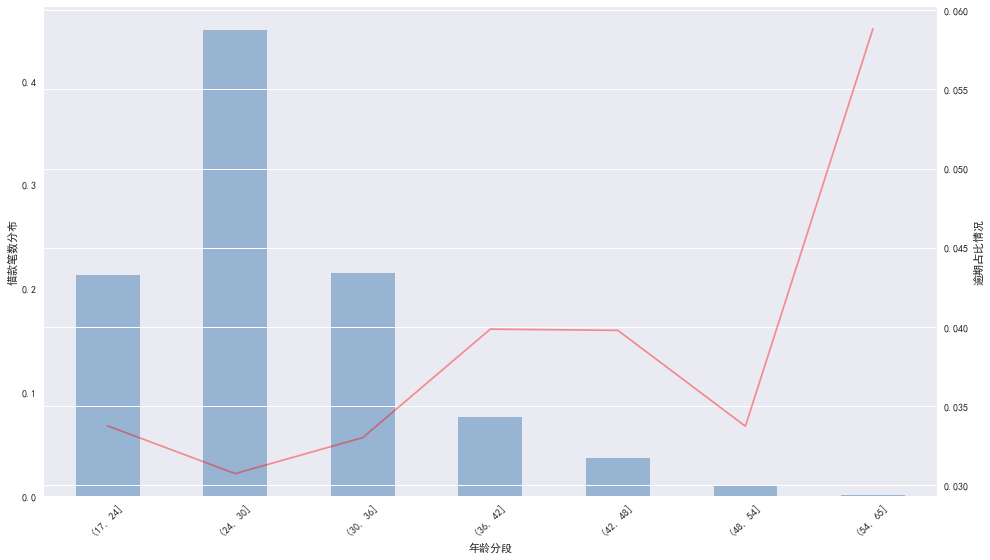

In [183]:
plt.figure(figsize=(16,9))
data_age['借款笔数分布'].plot(kind='bar',rot=45,color='steelblue',alpha=0.5,label="年龄")
plt.ylabel("借款笔数分布")
data_age['逾期占比'].plot(rot=45,color='red',alpha=0.4,secondary_y=True,label='年龄')
plt.ylabel("逾期占比情况")
plt.grid(True)
plt.show()

24到30岁 借款比例 最高。 但是坏账 率 确 很低。 逾期率比较小。



4. 不同学历的人的逾期表现

In [379]:
# df_edu

df_edu=pd.pivot_table(data=data,columns='标当前状态',index='学历认证',values='列表序号',aggfunc=np.size)
# 这里因为没有更多的数据。
# 所以成功 认证 我们就认为是 大专及以上。
# 未成功认证，我们就认为是 大专以下。

df_edu

标当前状态,已还清,正常还款中,逾期中
学历认证,,,
成功认证,41431,102676,4019
未成功认证,67698,69829,5577


In [380]:
# df_edu['借款笔数']
df_edu['借款笔数']=df_edu.sum(axis=1) # axis = 1 生成列
df_edu['借款笔数']

学历认证
成功认证     148126
未成功认证    143104
Name: 借款笔数, dtype: int64

In [381]:
# 借款笔数占比

df_edu['借款笔数占比']=df_edu['借款笔数']/df_edu['借款笔数'].sum()

df_edu['借款笔数占比']

学历认证
成功认证     0.508622
未成功认证    0.491378
Name: 借款笔数占比, dtype: float64

In [382]:
df_edu

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比
学历认证,,,,,
成功认证,41431,102676,4019,148126,0.508622
未成功认证,67698,69829,5577,143104,0.491378


In [383]:
# 逾期占比
df_edu['逾期占比']=df_edu['逾期中']/df_edu['借款笔数']
df_edu['逾期占比']

学历认证
成功认证     0.027132
未成功认证    0.038972
Name: 逾期占比, dtype: float64

In [384]:
df_edu
# 相比之下  成功认证的人 风险 要小一点。

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期占比
学历认证,,,,,,
成功认证,41431,102676,4019,148126,0.508622,0.027132
未成功认证,67698,69829,5577,143104,0.491378,0.038972


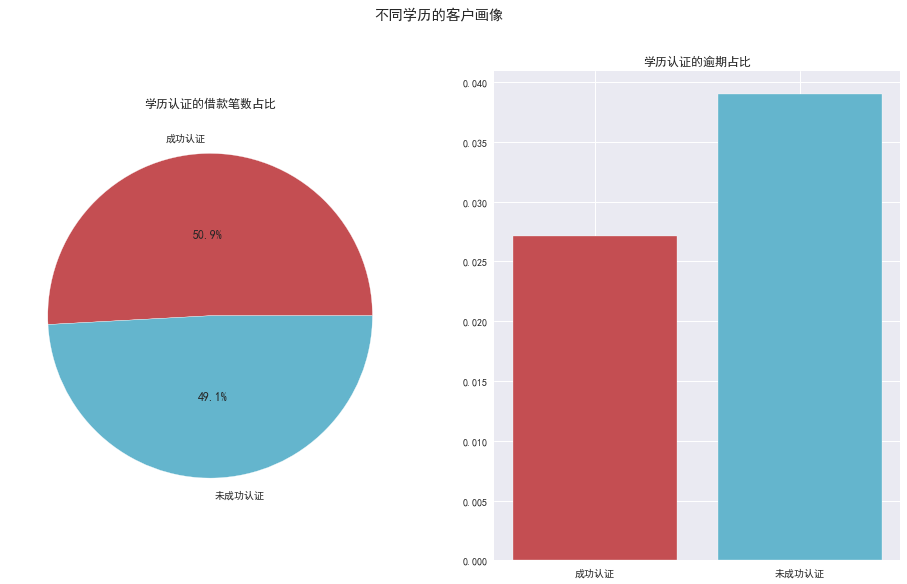

In [385]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.pie(x=df_edu['借款笔数占比'],labels=['成功认证','未成功认证'],colors=['r','c'],autopct='%.1f%%',pctdistance=0.5,labeldistance=1.1)
# autopct:百分比 例如 autopct=".1%" autopct='%.1f%%' 和字符串格式化 是一样的(只是需要用 % 包裹起来 。 
# 百分比形式 保留 1位 小数
plt.title("学历认证的借款笔数占比")

plt.subplot(122)
plt.bar(x=df_edu.index,height=df_edu['逾期占比'],color=['r','c'])
plt.title("学历认证的逾期占比")

plt.suptitle("不同学历的客户画像")
plt.show()

In [374]:
# 关于认证方面 发现都是重复工作 。
# 那么可以定义一个函数来处理。

def trans_ath(data,col,idx):
    df=pd.pivot_table(data=data,columns=col,index=idx,values='列表序号',aggfunc=np.size)
    df['借款笔数']=df.sum(axis=1) # axis = 1 生成列
    df['借款笔数占比']=df['借款笔数']/df['借款笔数'].sum()
    df['逾期占比']=df['逾期中']/df['借款笔数']
    def draw(df):
        plt.figure(figsize=(16,9))
        plt.subplot(121)
        plt.pie(x=df['借款笔数占比'],labels=['成功认证','未成功认证'],colors=['r','c'],autopct='%.1f%%',pctdistance=0.5,labeldistance=1.1)
        # autopct:百分比 例如 autopct=".1%" autopct='%.1f%%' 和字符串格式化 是一样的(只是需要用 % 包裹起来 。 
        # 百分比形式 保留 1位 小数
        plt.title("{0}的借款笔数占比".format(idx))
        
        plt.subplot(122)
        plt.bar(x=df.index,height=df['逾期占比'],color=['r','c'])
        plt.title("{0}的逾期占比".format(idx))
        plt.suptitle("{0}的客户画像".format(idx))
        plt.show()
    draw(df)
    
    return df
    

In [367]:
data.columns

Index(['列表序号', '借款金额', '借款期限', '借款利率', '借款成功日期', '初始评级', '借款类型', '是否首标', '年龄',
       '性别', '手机认证', '户口认证', '视频认证', '学历认证', '征信认证', '淘宝认证', '历史成功借款次数',
       '历史成功借款金额', '总待还本金', '历史正常还款期数', '历史逾期还款期数', '我的投资金额', '当前到期期数',
       '当前还款期数', '已还本金', '已还利息', '待还本金', '待还利息', '标当前逾期天数', '标当前状态', '上次还款日期',
       '上次还款本金', '上次还款利息', '下次计划还款日期', '下次计划还款本金', '下次计划还款利息', '记录日期',
       'age_bin', '年龄分段'],
      dtype='object')

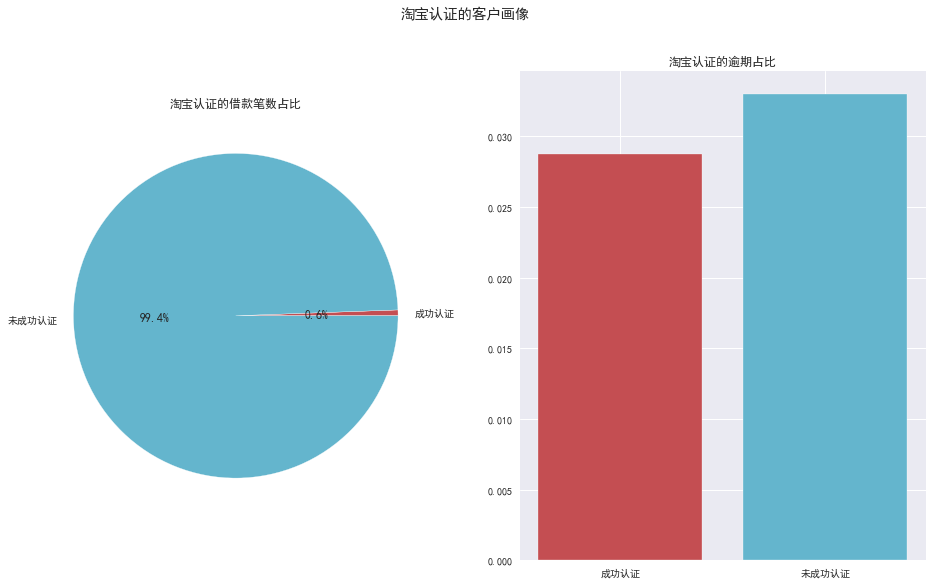

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期占比
淘宝认证,,,,,,
成功认证,1073,549,48,1670,0.005734,0.028743
未成功认证,108056,171956,9548,289560,0.994266,0.032974


In [389]:
trans_ath(data,'标当前状态','淘宝认证') # 淘宝认证

# 淘宝认证  感觉 还有点作用。


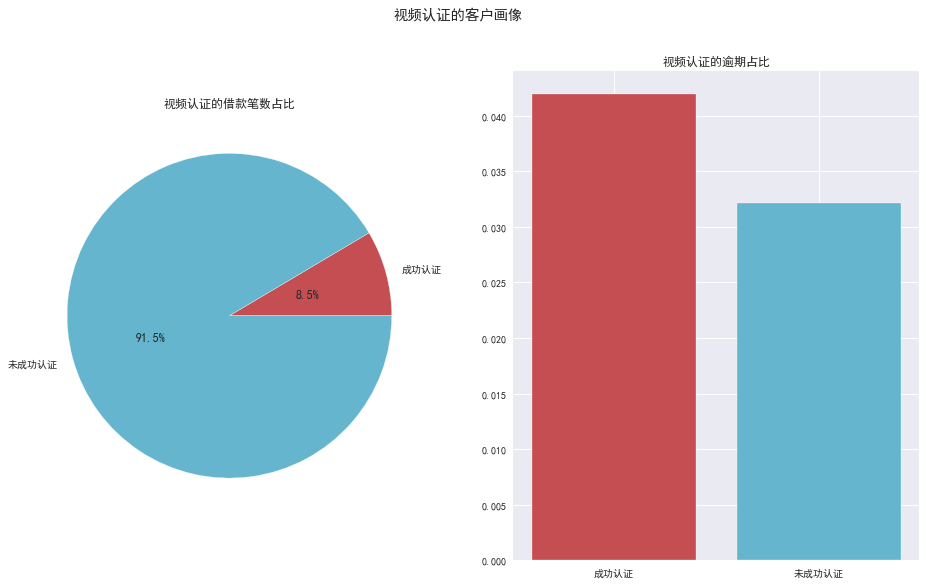

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期占比
视频认证,,,,,,
成功认证,15490,8302,1041,24833,0.085269,0.041920
未成功认证,93639,164203,8555,266397,0.914731,0.032114


In [376]:
trans_ath(data,'标当前状态','视频认证') # 视频认证

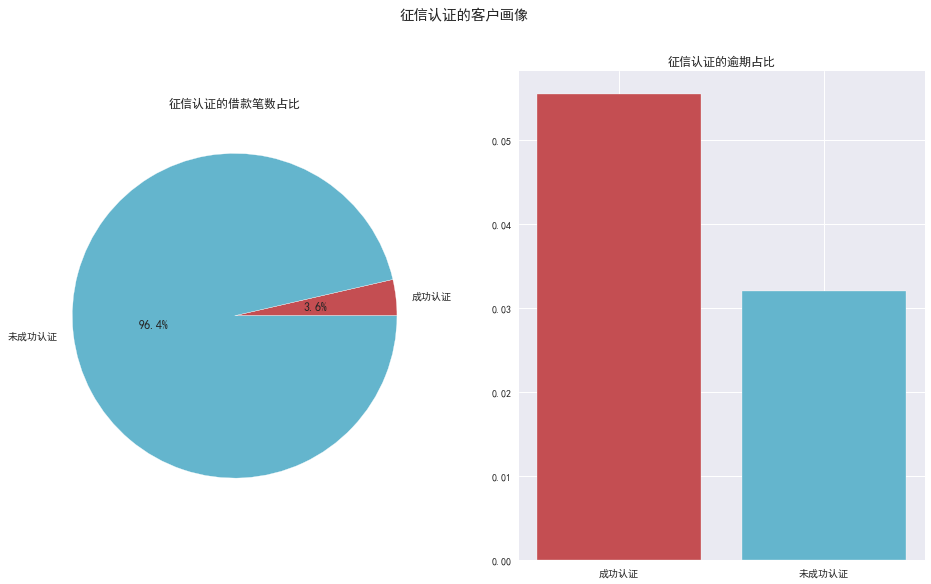

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期占比
征信认证,,,,,,
成功认证,4093,5782,580,10455,0.035899,0.055476
未成功认证,105036,166723,9016,280775,0.964101,0.032111


In [377]:
trans_ath(data,'标当前状态','征信认证') # 征信认证
# 为啥 征信认证 成功 的 反而 逾期率较高。



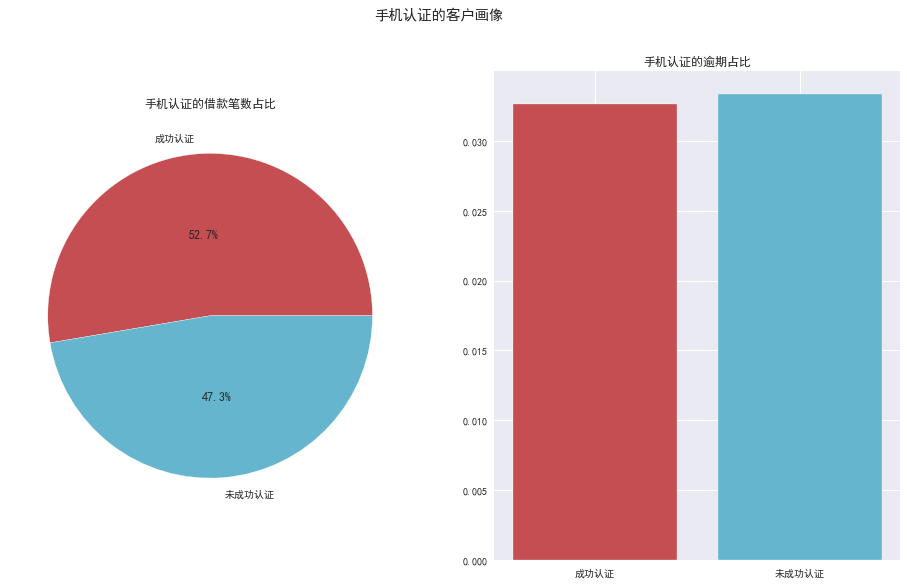

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期占比
手机认证,,,,,,
成功认证,73931,74458,5006,153395,0.526714,0.032635
未成功认证,35198,98047,4590,137835,0.473286,0.033301


In [386]:
trans_ath(data,'标当前状态','手机认证') # 手机认证

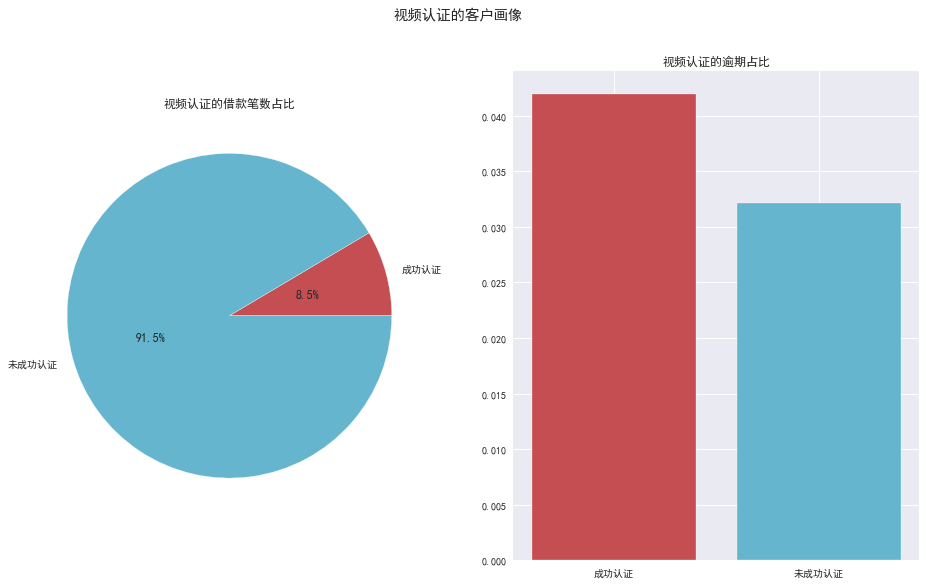

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期占比
视频认证,,,,,,
成功认证,15490,8302,1041,24833,0.085269,0.041920
未成功认证,93639,164203,8555,266397,0.914731,0.032114


In [388]:
trans_ath(data,'标当前状态','视频认证') 

# 感觉这些认证没啥卵用。 该 逾期高还是逾期高啊。
# 当然也可能是 未认证的 基数 比较大 。

## 总结

在性别差异方面男性借款数超过女性两倍。

逾期方面男性用户也高于女性。

学历认证面。 几乎是 1比1 

相比之下。 通过认证的 逾期较低

以及淘宝 认证多数没有认证 。 

但是 认证的人  逾期 比 未认证的低 。

年龄方面。 18 到 36 岁 借款占总数 80%,逾期却是 最低的。

对于 55岁以上的 借款笔数不多。 但是 逾期率很高。

其他的认证 参考意义不大。 

但是 通过征信认证的人却 逾期较高。 可以再 仔细看看 问题出在哪里。

视频认证，手机认证等。 也要严格审核。 不要太依赖这些认证。
